In [1]:
import os

import pandas
import seaborn
import seaborn.objects as so
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(f"pandas={pandas.__version__}, seaborn={seaborn.__version__}, wordcloud={wordcloud.__version__}, matplotlib={matplotlib.__version__}")
!python --version


pandas=2.1.2, seaborn=0.13.0, wordcloud=1.9.2, matplotlib=3.8.1
Python 3.10.12


In [3]:
os.makedirs('figures',exist_ok=True)

In [4]:
sec1_df = pandas.read_excel('ANONYMIZED postdoctoral survey results.xlsx',sheet_name=0)

In [5]:
map_quant_cols = {'current':['Are you still in the program?','Current'],
 'imp_curric':['How important do you think having an official training curriculum was/is?','Curriculum'],
 'imp_workshop':['How valuable is/was running workshops to your training experience?','Workshops'],
 'imp_forum':['How valuable is/was working with the image.sc forum to your training experience?','Forum'],
 'imp_projects':['How valuable is/was working on individual analysis projects to your training experience?','Analysis\nprojects'],
 'imp_code':['How valuable is/was writing code to your training experience?','Code'],
 'imp_data':['How valuable is/was working on data-science-heavy-projects to your training experience?','Data\nscience'],
 'imp_papers':['How valuable is/was writing papers to your training experience?','Papers'],
 'imp_staff':['How valuable is/was training with/from permanent staff members (staff scientists/SWEs) to your training experience?','Staff\ntraining'],
 'imp_peer':['How valuable is/was training with/from other postdoc program members to your training experience?','Peer\ntraining'],
 'imp_collabs':['How valuable is/was interaction with collaborators to your training experience?','Collaborator\ninteraction'],
 'imp_pm':['How valuable is/was explicit and/or implicit training on project management skills to your training experience?','Project\nmanagement'],
 'imp_comms':['How valuable is/was explicit and/or implicit training on communication skills to your training experience?','Communication\nskills'],
 'rank_curric':['Rank these aspects of the program in terms of most to least important.  [Curriculum]','Curriculum'],
 'rank_workshop':['Rank these aspects of the program in terms of most to least important.  [Workshops]','Workshops'],
 'rank_forum':['Rank these aspects of the program in terms of most to least important.  [Forum]','Forum'],
 'rank_projects':['Rank these aspects of the program in terms of most to least important.  [Analysis projects]','Analysis\nprojects'],
 'rank_code':['Rank these aspects of the program in terms of most to least important.  [Code]','Code'],
 'rank_data':['Rank these aspects of the program in terms of most to least important.  [Data science]','Data\nscience'],
 'rank_papers':['Rank these aspects of the program in terms of most to least important.  [Papers]','Papers'],
 'rank_staff':['Rank these aspects of the program in terms of most to least important.  [Staff training]','Staff\ntraining'],
 'rank_peer':['Rank these aspects of the program in terms of most to least important.  [Peer training]','Peer\ntraining'],
 'rank_collabs':['Rank these aspects of the program in terms of most to least important.  [Collaborator interaction]','Collaborator\ninteraction'],
 'rank_pm':['Rank these aspects of the program in terms of most to least important.  [Project management]','Project\nmanagement'],
 'rank_comms':['Rank these aspects of the program in terms of most to least important.  [Communication skills]','Communication\nskills'],}

quant_cols = [v[0] for k,v in map_quant_cols.items()] # list of quantitative columns
imp_cols = [x for x in map_quant_cols.keys() if 'rank' not in x] # list of columns to melt for importance score
rank_cols = [x for x in map_quant_cols.keys() if 'imp' not in x] # list of columns to melt for importance rank
quant_cols_by_q = {v[0]:k for k,v in map_quant_cols.items()} #assign shortnames to columns
rename_for_legends = {k:v[1] for k,v in map_quant_cols.items()} #get legend names from shortnames


In [6]:
quant_df = sec1_df[quant_cols]
quant_df.rename(columns=quant_cols_by_q,inplace=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_6662/3567671716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant_df.rename(columns=quant_cols_by_q,inplace=True)


In [7]:
so.Plot.config.theme.update(seaborn.axes_style("white"))

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_6662/2018625848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_df_subset.rename(columns=rename_for_legends,inplace=True)


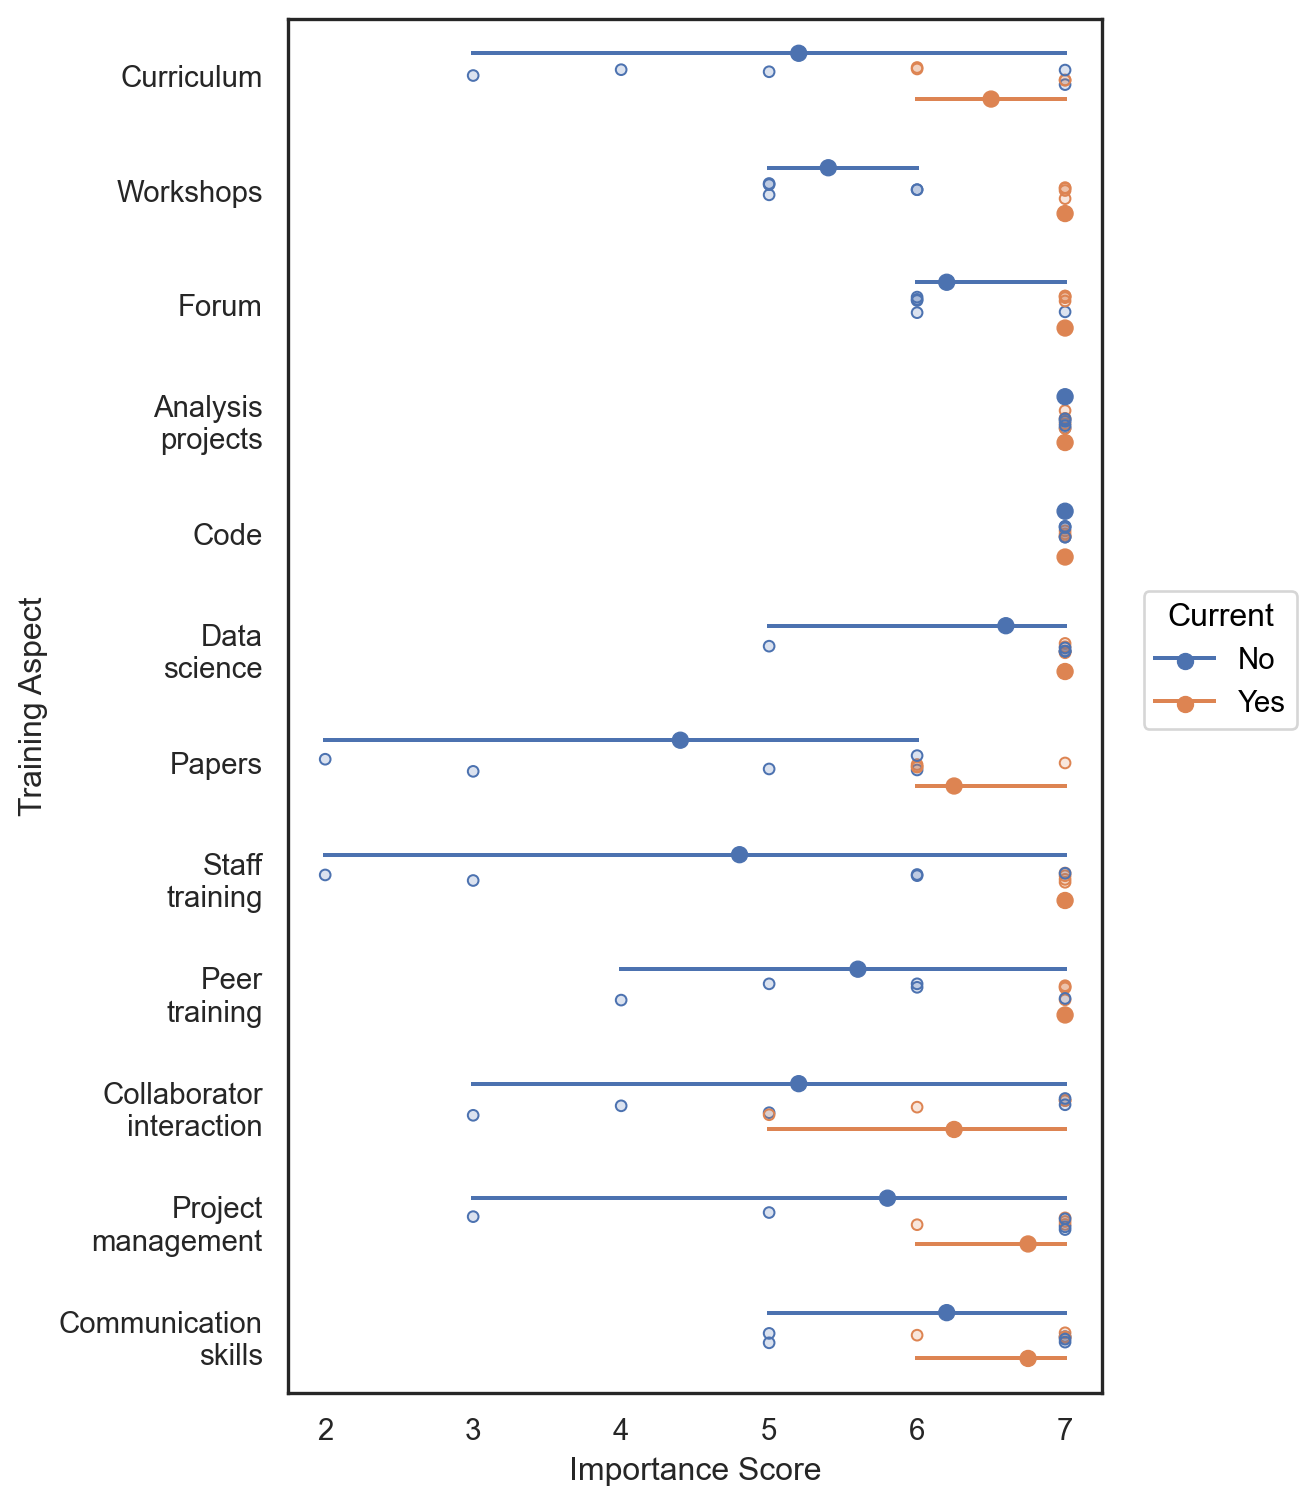

In [8]:
imp_df_subset = quant_df[imp_cols]
imp_df_subset.rename(columns=rename_for_legends,inplace=True)
imp_df = imp_df_subset.melt(id_vars='Current',var_name='Training Aspect',value_name ='Importance Score')
p=(so.Plot(data=imp_df,y='Training Aspect',x='Importance Score',color='Current').layout(size=(6,8))
 .add(so.Dots(),so.Jitter()).add(so.Range(), so.Dodge()).add(so.Dot(),so.Agg('mean'),so.Dodge()))
p.save(loc='figures/ImportanceGraph.svg')

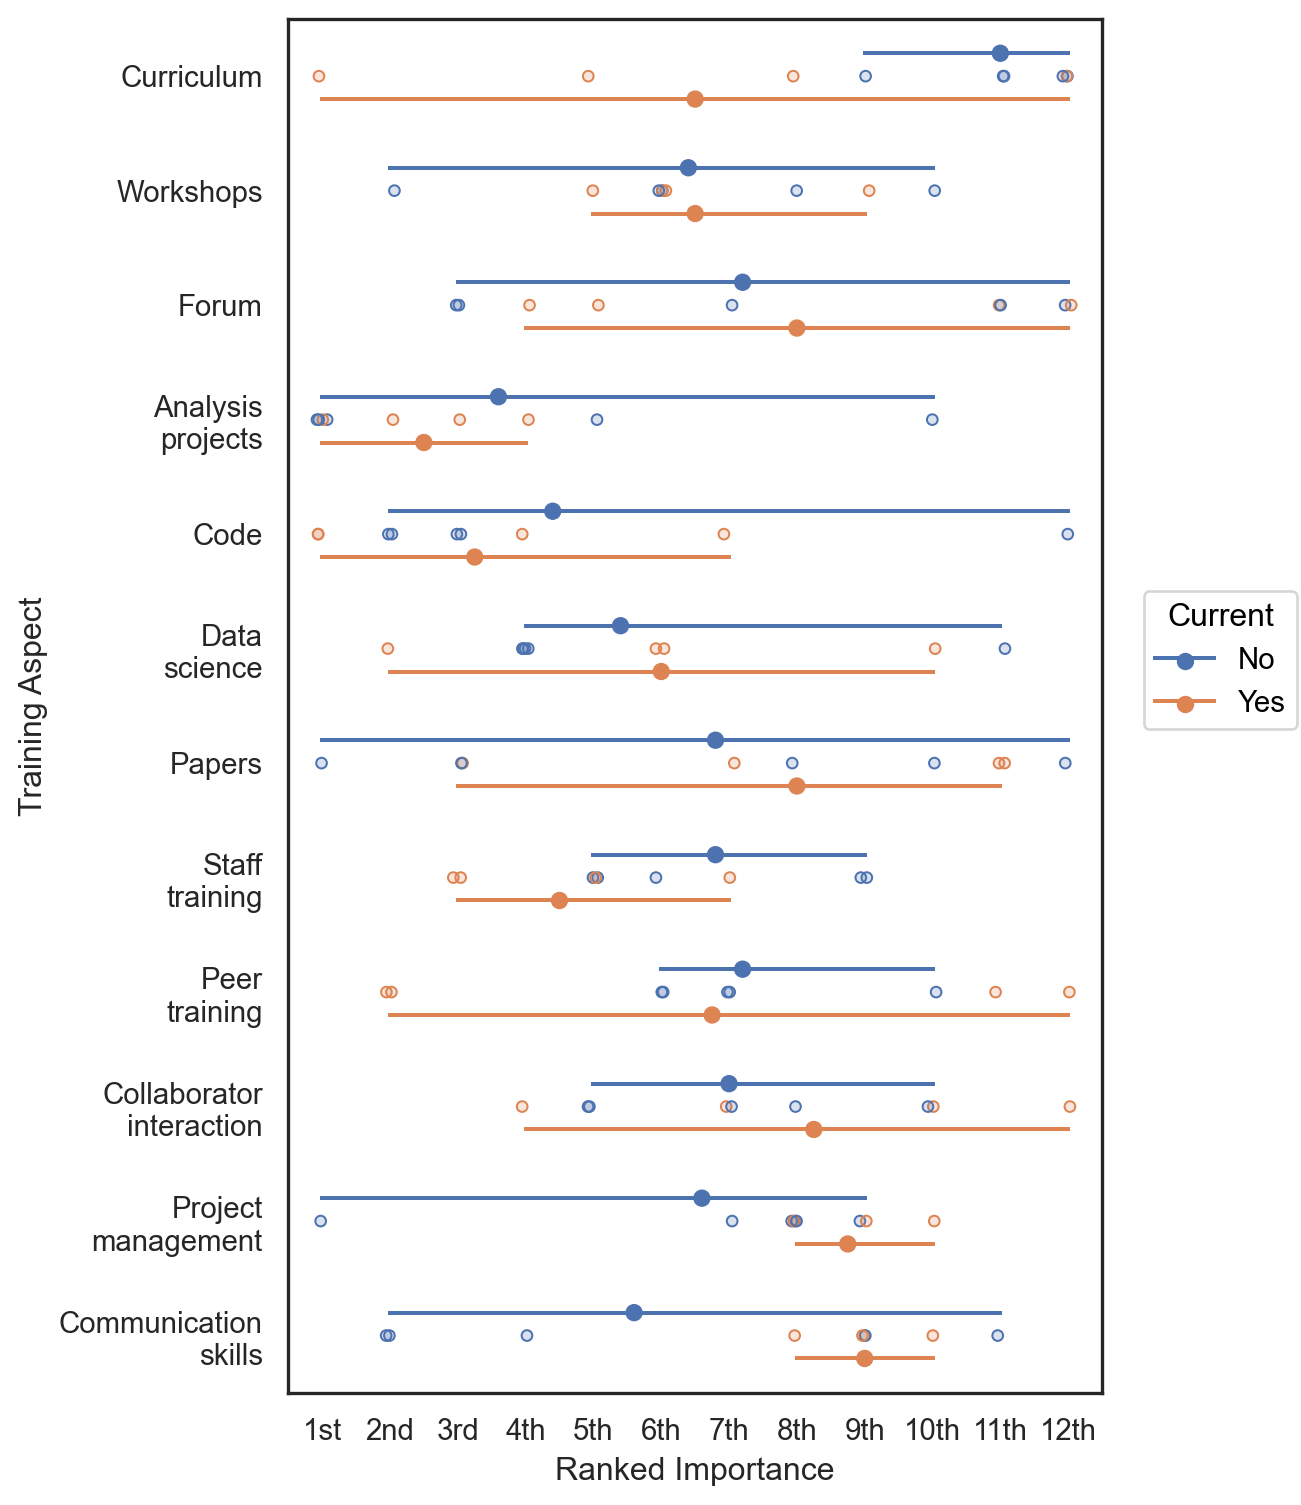

In [9]:
rank_df_subset = quant_df[rank_cols]
rank_df_subset_renamed = rank_df_subset.rename(columns=rename_for_legends)
rank_df = rank_df_subset_renamed.melt(id_vars='Current',var_name='Training Aspect',value_name ='Ranked Importance')
p1 = (so.Plot(data=rank_df,y='Training Aspect',x='Ranked Importance',color='Current').layout(size=(6,8)).scale(x=so.Nominal(order=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th']))
      .add(so.Dots(),so.Jitter()).add(so.Range(), so.Dodge(),orient='y').add(so.Dot(),so.Agg('mean'),so.Dodge(),orient='y'))
p1.save(loc='figures/ImportanceRanked.svg')

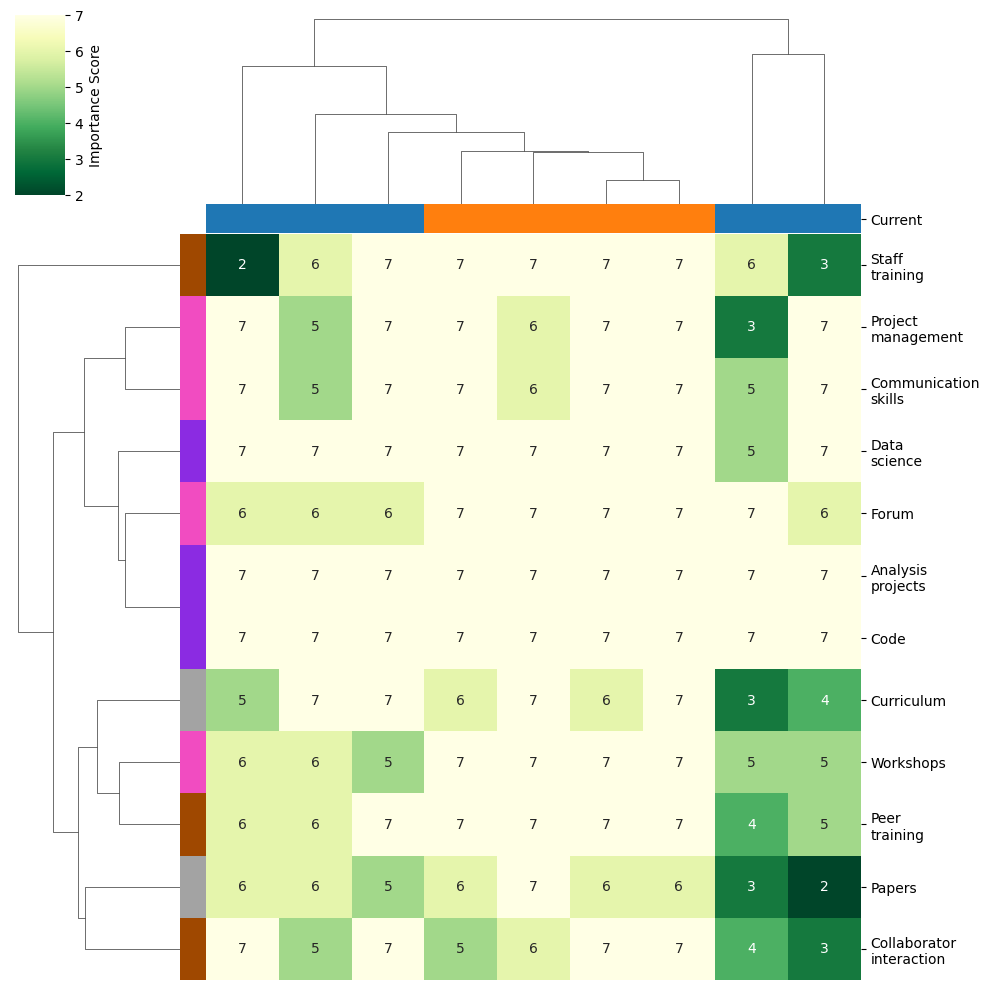

In [10]:
current_cmap = {'No':'#1f77b4', 'Yes':'#ff7f0e'}
traintype_groups = {'Curriculum':3,'Workshops':2,'Forum':2,'Analysis\nprojects':0,
'Code':0,'Data\nscience':0,'Papers':3,'Staff\ntraining':1,
'Peer\ntraining':1,'Collaborator\ninteraction':1,'Project\nmanagement':2,'Communication\nskills':2}
cmap_to_use = seaborn.color_palette('bright')
cmap_to_use = [cmap_to_use[4],cmap_to_use[5],cmap_to_use[6],cmap_to_use[7]]
traintype_cmap = {k:cmap_to_use[v] for k,v in traintype_groups.items()}
seaborn.clustermap(imp_df_subset.drop(columns=['Current']).T,cmap=seaborn.color_palette("YlGn_r", as_cmap=True),
                   col_colors=imp_df_subset['Current'].map(current_cmap),
                   row_colors=imp_df_subset.drop(columns=['Current']).T.index.map(traintype_cmap),
                   xticklabels=False,
                  cbar_kws={'label':'Importance Score'},annot=True)
plt.savefig('figures/ImportanceScoreCluster.svg')

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_6662/1650816331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df_subset[x]=rank_df_subset[x].str.replace(r'[0-9]{1,2}[a-z]{2}',lambda x: f"{x.group()}"[:-2],regex=True).astype('int')
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_6662/1650816331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df_subset[x]=rank_df_subset[x].str.replace(r'[0-9]{1,2}[a-z]{2}',lambda x: f"{x.group()}"[:-2],regex=True).astype('int')
/var/f

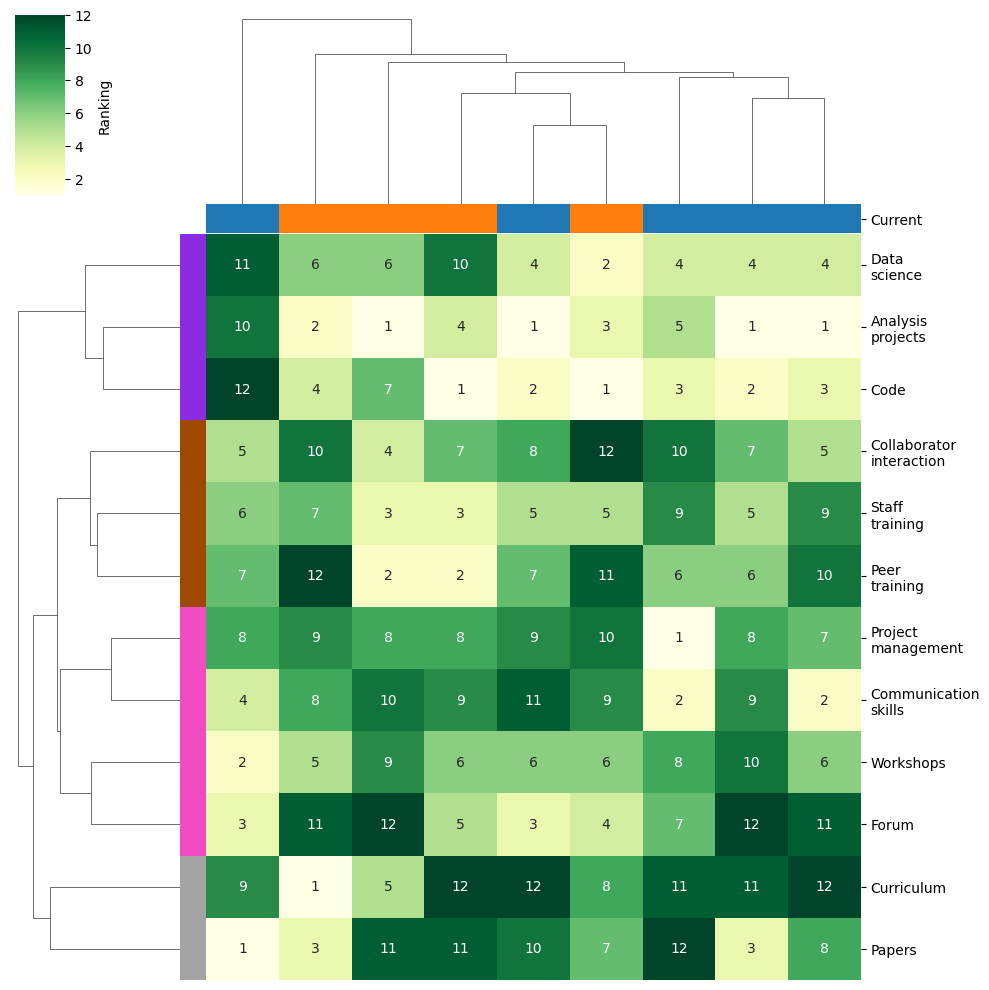

In [11]:
for x in rank_cols[1:]: #don't want current
    rank_df_subset[x]=rank_df_subset[x].str.replace(r'[0-9]{1,2}[a-z]{2}',lambda x: f"{x.group()}"[:-2],regex=True).astype('int')
rank_df_subset_renamed2 = rank_df_subset.rename(columns=rename_for_legends)
seaborn.clustermap(rank_df_subset_renamed2.drop(columns=['Current']).T,cmap=seaborn.color_palette("YlGn", as_cmap=True),
                   col_colors=rank_df_subset_renamed2['Current'].map(current_cmap),
                   row_colors=rank_df_subset_renamed2.drop(columns=['Current']).T.index.map(traintype_cmap),
                   xticklabels=False,
                  cbar_kws={'label':'Ranking'},annot=True)
plt.savefig('figures/ImportanceRankCluster.svg')

In [3]:
map_multi_cols = {'current':'Are you still in the program?',
    'len_ideal':'What in your opinion is the ideal length of this program?',
 'len_train':'Based purely on training, how was the program length?',
 'len_life':'When also considering the impact on your personal life that being in program entails (e.g. salary, location requirement) , how was the program length?',
 'right_choice':'When looking back, do you think joining a training program was the right choice for you?'
}

sec2_df = pandas.read_excel('ANONYMIZED postdoctoral survey results.xlsx',sheet_name=1)

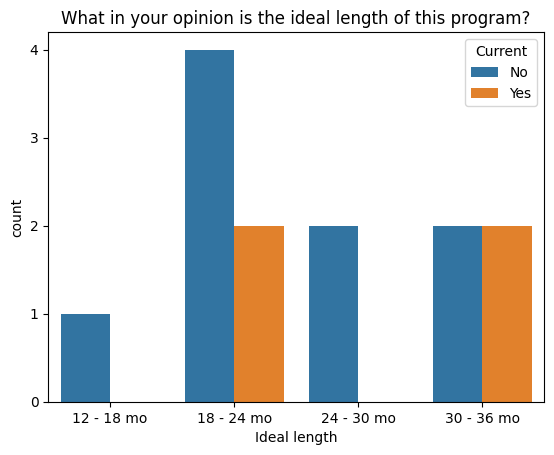

In [5]:
len_hist = {'Ideal length':[],'Current':[]}
for row in sec2_df.iterrows():
    for eachlen in row[1][map_multi_cols['len_ideal']].split(', '):
        len_hist['Ideal length'].append(eachlen)
        len_hist['Current'].append(row[1][map_multi_cols['current']])
len_order = list(set(len_hist['Ideal length']))
len_order.sort()
len_df = pandas.DataFrame(len_hist)
ax = seaborn.countplot(data=len_df,x='Ideal length',hue='Current',order=len_order)
yticks = range(0,5)
ax.set_yticks(yticks)
ax.set_title('What in your opinion is the ideal length of this program?')
plt.savefig('figures/LengthHist.svg')

In [13]:
sec2_df[map_multi_cols['len_train']]

0    About right
1    About right
2    About right
3    About right
4    About right
5            NaN
6            NaN
7            NaN
8            NaN
Name: Based purely on training, how was the program length?, dtype: object

In [14]:
sec2_df[map_multi_cols['len_life']]

0    About right
1    About right
2    About right
3    About right
4    About right
5            NaN
6            NaN
7            NaN
8            NaN
Name: When also considering the impact on your personal life that being in program entails (e.g. salary, location requirement) , how was the program length?, dtype: object

In [15]:
sec2_df[map_multi_cols['right_choice']]

0                                                  Yes
1                                                  Yes
2                                                  Yes
3    YES. 100/100 times I would always make the sam...
4                                                Maybe
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
Name: When looking back, do you think joining a training program was the right choice for you?, dtype: object

In [3]:
map_wordcloud_cols = {
     'goals':'What were your career goals before you started the program and how (if at all) did they change during or since the program?',
     'not_mentioned':'What aspects not already mentioned do you think were very important to your training experience? Feel free to provide multiple answers.',
 'missing':'What aspects do you think were missing from your training experience? Feel free to provide multiple answers.',
 'share_external':"Anything else you'd want to add that you're ok sharing as part of the paper?"}

sec3_df = pandas.read_excel('ANONYMIZED postdoctoral survey results.xlsx',sheet_name=2)

In [4]:
def wordcloud_func(col_name,new_stop_list,filename,df,cmap='hsv'):

    all_stopwords = list(STOPWORDS)+new_stop_list+map_wordcloud_cols[col_name].split(' ')
    wordcloud_words = ' '.join(list(df[map_wordcloud_cols[col_name]].dropna())).lower()
    
    import random
    
    
    
    wc = WordCloud(background_color='white',colormap=cmap,collocations=False,min_word_length=4,min_font_size=34,
                   stopwords=all_stopwords,regexp=r"\w[\w'\/]+",
                   relative_scaling=1,width=2400,height=1800,max_words=50
                  ).generate(wordcloud_words)
    plt.title(map_wordcloud_cols[col_name],wrap=True)
    plt.axis('off')
    plt.imshow(wc)
    plt.savefig(f'figures/{filename}.svg')

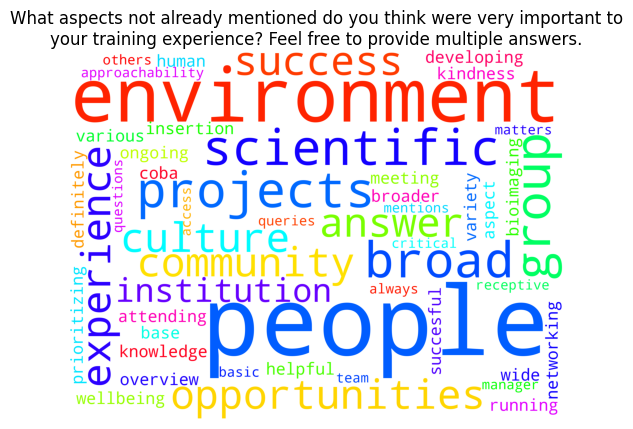

In [7]:
wordcloud_func('not_mentioned',
               ['program','beth','work','amazing','biology','biologist','fantastic','incredibly','really','wish'],
               'NotMentioned',
               sec3_df)

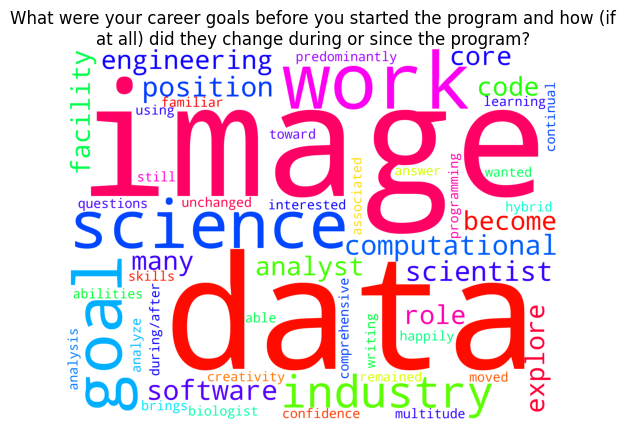

In [19]:
wordcloud_func('goals',[],'Goals',sec2_df)

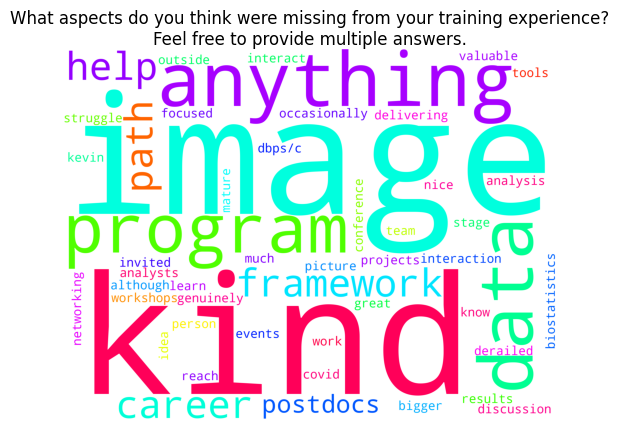

In [20]:
wordcloud_func('missing',[],'WhatWasMissing',sec3_df)

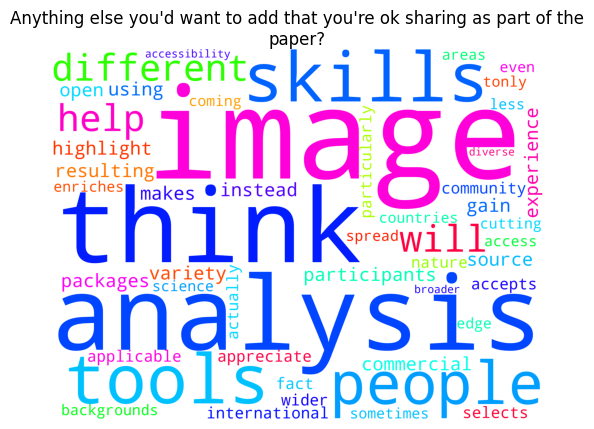

In [21]:
wordcloud_func('share_external',['program'],'AnythingElse',sec3_df)